In [1]:
# gerekli kütüphaneleri yükleme

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer as TF
from sklearn.metrics import silhouette_score
import nltk 
import re
import os

C:\Users\pegas\AppData\Local\Temp\ipykernel_20884\614724752.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# veri setini çağırma

yt_comments = pd.read_csv('./data/comments/youtube_dataset.csv')

yt_comments



,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122
...,...,...,...,...,...,...,...
19295,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxqlnG8nQ36eDoXKbJ4AaABAg,KineZ,Claim your “before 1 billion” certificate here,2020-07-28T18:39:38Z,5087
19296,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgwZsgM-0pn9tiFxmOh4AaABAg,varun raj,This means that you are before 1 billion views.,2020-09-09T11:41:30Z,6
19297,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxeBmhoyhSILM0HPux4AaABAg,hey harry,We won't have school till 2021 \nMay God help ...,2020-09-09T10:03:04Z,5
19298,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,Ugy6KVBjdz7Rj2yxTER4AaABAg,Jannat EXO-L,Literally saw this song from 1M -> 996M,2020-09-08T19:41:18Z,4


In [3]:
# Veri seti ile ilgili bilgiler

yt_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300 entries, 0 to 19299
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Video Name    19300 non-null  object
 1   Channel Name  19300 non-null  object
 2   Comment Id    19300 non-null  object
 3   User Name     19299 non-null  object
 4   Comment       19300 non-null  object
 5   Date          19300 non-null  object
 6   Likes         19300 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [4]:
#Veri setinden yorumları ayıklama

yt_comments_texts = yt_comments['Comment']

yt_comments_texts

0        The people who liked this comment is officiall...
1                 - Wait, it's 7B views\n- Always has been
2        *Teacher: What is the population of the Earth?...
3        Let's be honest this wasn't your recommendatio...
4        Types Of People:\n10% Enjoying Song \n90% Chec...
                               ...                        
19295       Claim your “before 1 billion” certificate here
19296      This means that you are before 1 billion views.
19297    We won't have school till 2021 \nMay God help ...
19298              Literally saw this song from 1M -> 996M
19299    Podría escuchar esta canción la misma cantidad...
Name: Comment, Length: 19300, dtype: object

In [5]:
# Yprum içindeki yazım imla kurallarını ayıklama
comments = []
for i in range(len(yt_comments_texts)):
    comment = re.sub('[^A-za-z]',' ',yt_comments_texts.values[i]).lower().split()
    comments.append(comment)

In [6]:
# stop words ayıklama ve listeye atama

file_len = os.listdir('./data/stopwords')
file_len = len(file_len)
stop_words_list = []
for file in range(file_len):
    file_N = set(open(f'./data/stopwords/{file}.txt','+r',encoding='utf-8',errors='ignore').read())
    for words in file_N:
        stop_words_list.append(words)

In [7]:
# comment içinde stop words tespiti ve temizlenmesi

ps = nltk.PorterStemmer()

for i in range(len(comments)):
    comments[i] = [ps.stem(x) for x in comments[i] if not x in stop_words_list]

comments

[['the',
  'peopl',
  'who',
  'like',
  'thi',
  'comment',
  'is',
  'offici',
  'befor',
  'view'],
 ['wait', 'it', 'view', 'alway', 'ha', 'been'],
 ['teacher',
  'what',
  'is',
  'the',
  'popul',
  'of',
  'the',
  'earth',
  'me',
  'around',
  'one',
  'despacito'],
 ['let',
  'be',
  'honest',
  'thi',
  'wasn',
  'your',
  'recommend',
  'you',
  'search',
  'for',
  'it'],
 ['type', 'of', 'peopl', 'enjoy', 'song', 'check', 'view'],
 ['million', 'comment', 'if', 'you', 'find', 'mine', 'your', 'legend'],
 ['claim',
  'your',
  'here',
  'befor',
  'billion',
  'ticket',
  'here',
  'they',
  'll',
  'be',
  'out',
  'pretti',
  'soon'],
 ['the',
  'one',
  'who',
  'are',
  'not',
  'from',
  'tik',
  'tok',
  'can',
  'like',
  'thi',
  'comment'],
 ['song', 'spanish', 'comment', 'english', 'hotel', 'trivago'],
 ['kimler', 'burda'],
 ['the',
  'first',
  'viewer',
  'must',
  'feel',
  'like',
  'the',
  'king',
  'of',
  'the',
  'world'],
 ['just', 'imagin', 'how', 'mani', 

In [8]:
# Dil Grupları StopWordslere göre düzenlenmiştir.

lang = {'Arabic':0,'Bengali':1,'Bulgarian':2,'Czech':3,'English':4,'Finnish':5,'French':6,'German':7,'Hindi':8,'Hungarian':9,'Italian':10,'Marathi':11,'Persian':12,'Polish':13,'Portuguese':14,'Roumanian':15,'Russian':16,'Spanish':17,'Sweedish':18}


In [9]:
# kelime listesi sayısal vektöre dönüştürme işlemi

comments_flat = [comment for sublist in comments for comment in sublist]
tfidf_model = TF(max_features=2000)
X_tfidf = tfidf_model.fit_transform(comments_flat)

In [10]:
#k-means algoritması ile kümeleme işlemi

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=len(lang), init='k-means++', random_state=123)
kmeans.fit(X_tfidf)

# her bir cluster etiketini daha önce hazır ettiğimiz lang dic ilişkilendirme

cluster_labels_lang = [list(lang.keys())[list(lang.values()).index(label)] for label in kmeans.labels_]


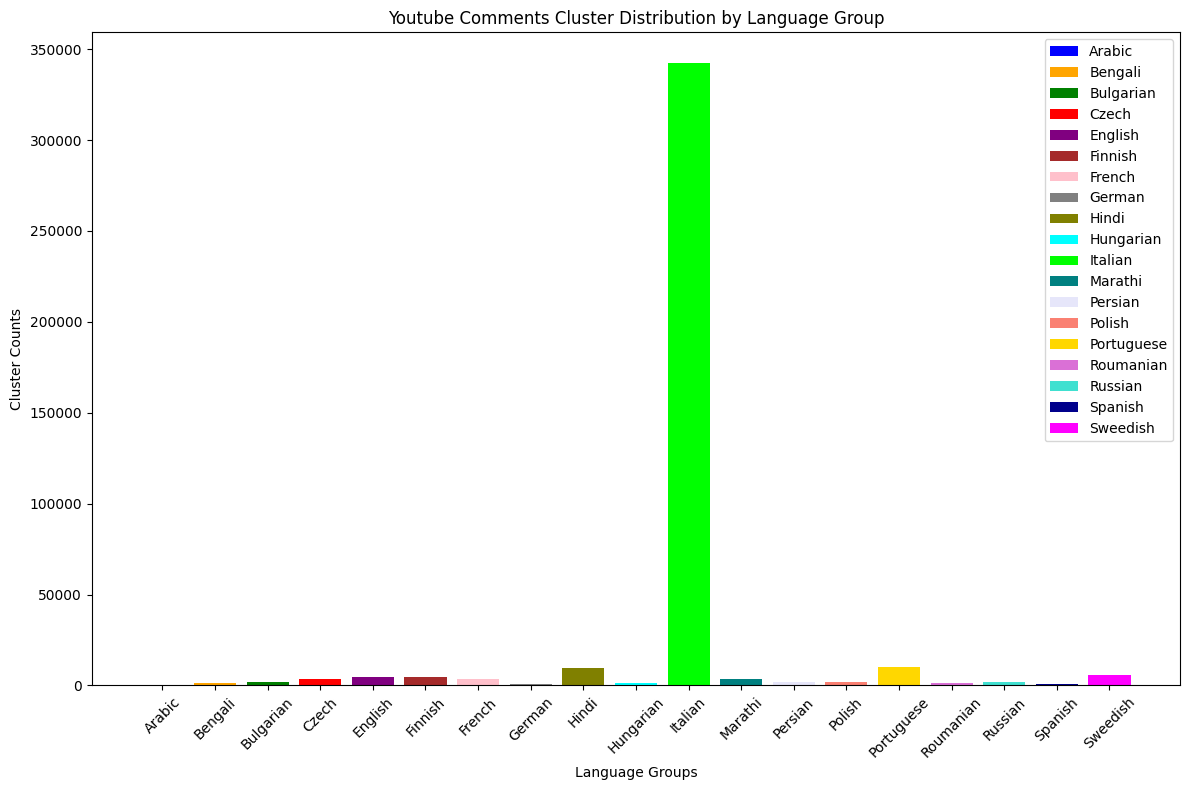

In [11]:
cluster_counts = {lang_key: cluster_labels_lang.count(lang_key) for lang_key in lang.keys()}

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 
          'lime', 'teal', 'lavender', 'salmon', 'gold', 'orchid', 'turquoise', 'darkblue', 'magenta']

# Dil grupları

languages = list(lang.keys())

# Dil gruplarına ait küme sayıları

cluster_counts_values = list(cluster_counts.values())

# Barplot oluşturma

plt.figure(figsize=(12, 8))
bars = plt.bar(languages, cluster_counts_values, color=colors)

# Legend oluşturma

plt.legend(bars, languages, loc='upper right')

plt.title('Youtube Comments Cluster Distribution by Language Group')
plt.xlabel('Language Groups')
plt.ylabel('Cluster Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# X: veri noktaları, cluster_labels: veri noktalarının küme etiketleri

wcss = kmeans.inertia_
print("WCSS:", wcss)

WCSS: 298504.6550878025


In [18]:
# X: veri noktaları, cluster_labels: veri noktalarının küme etiketleri

silhouette_avg = silhouette_score(X_tfidf.toarray(), kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

KeyboardInterrupt: 